In [1]:
import igraph as ig
import matplotlib.pyplot as plt

In [2]:
g = ig.load("graph.gml")

In [24]:
communities = g.community_edge_betweenness()

In [25]:
communities = communities.as_clustering()

In [5]:
num_communities = len(communities)
palette1 = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

In [6]:
g.vs["label"] = ["\n\n" + label for label in g.vs["label"]]

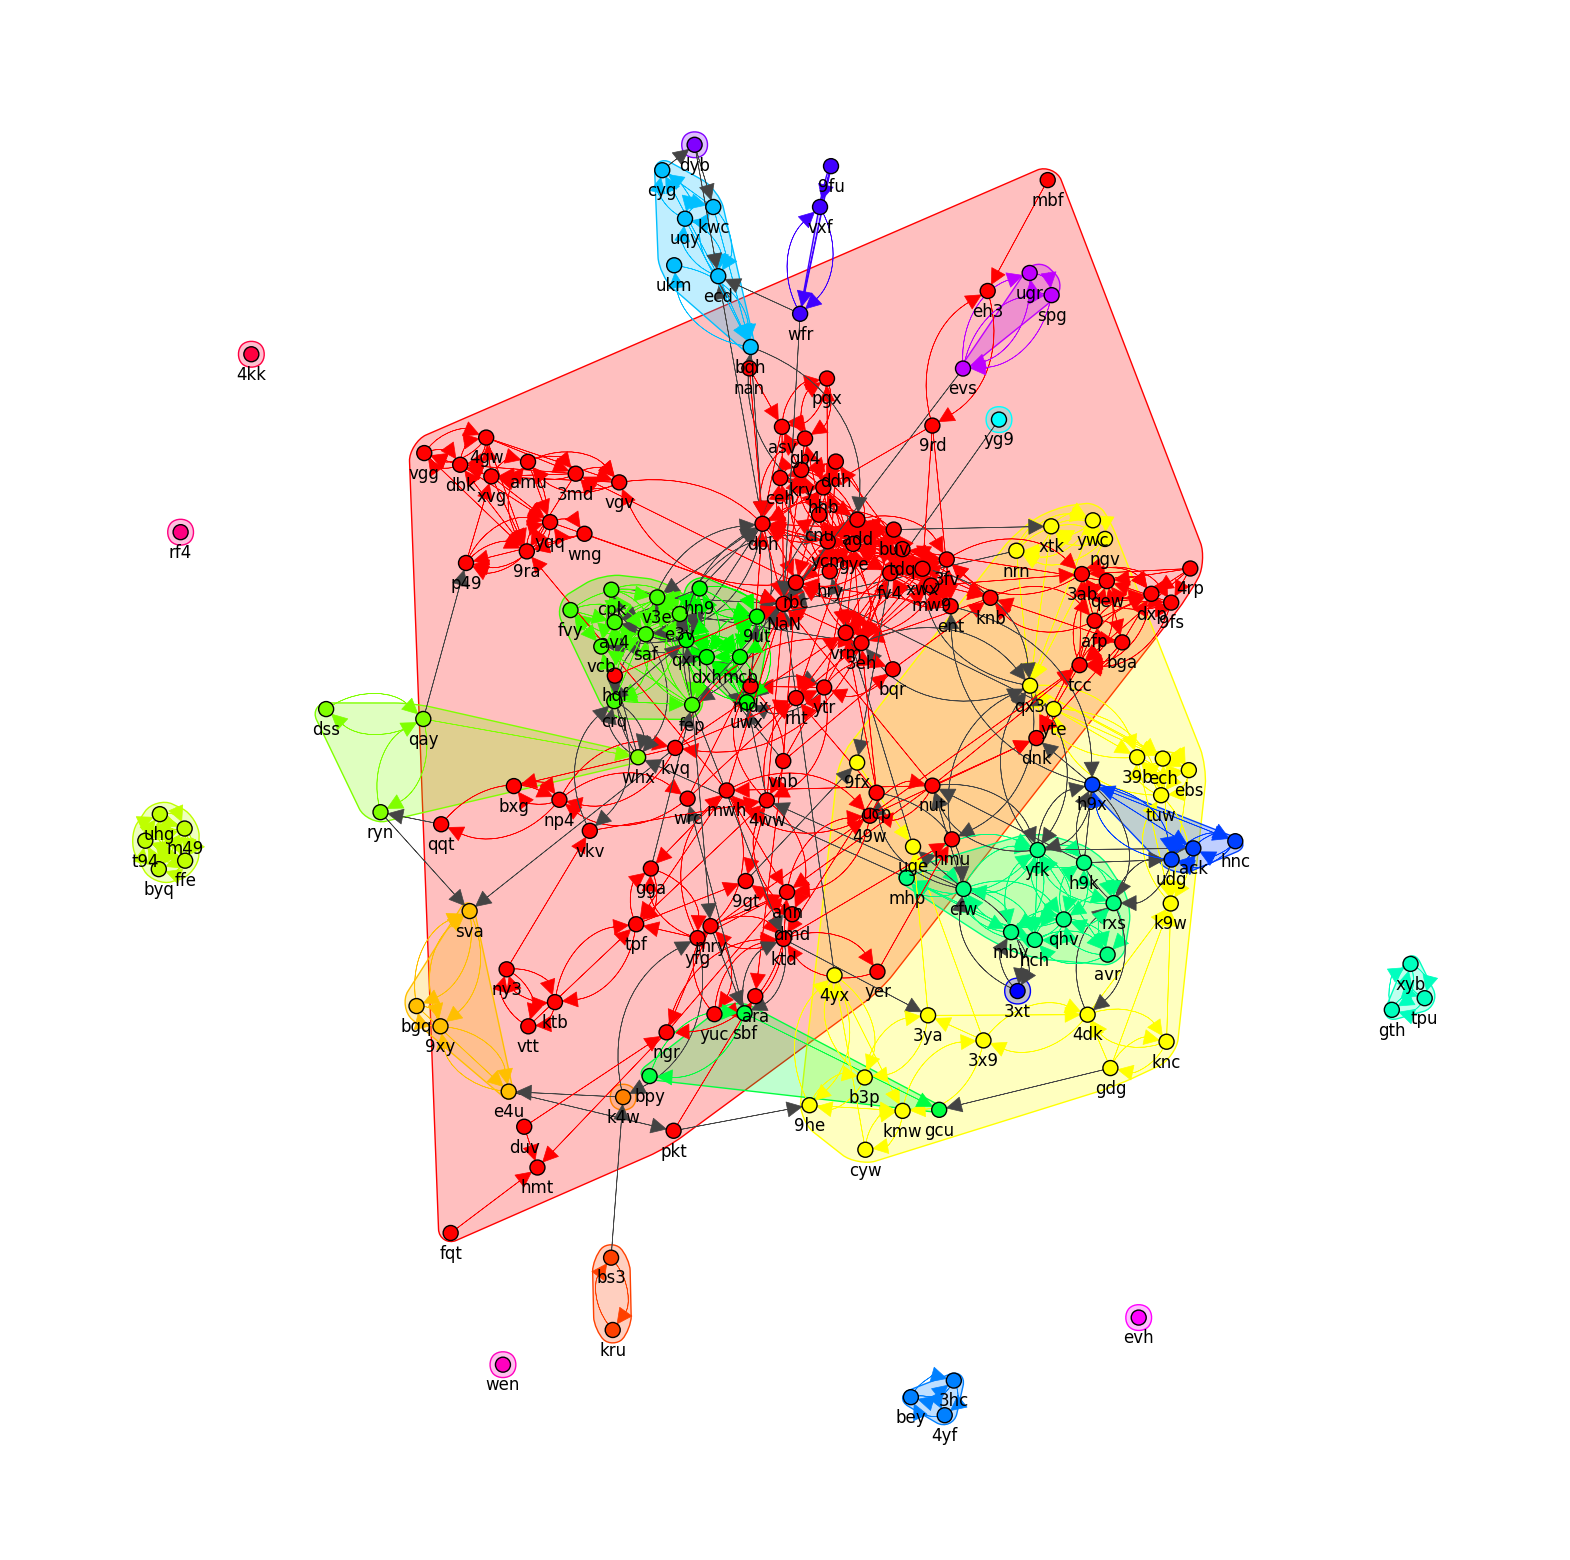

In [7]:
fig1, ax1 = plt.subplots()
ig.plot(
    communities,
    target=ax1,
    mark_groups=True,
    palette=palette1,
    vertex_size=15,
    edge_width=0.5,
)
fig1.set_size_inches(20, 20)

In [8]:
layout = g.layout_kamada_kawai()
g.vs["x"], g.vs["y"] = list(zip(*layout))
g.vs["size"] = 15
g.es["size"] = 15

In [9]:
cluster_graph = communities.cluster_graph(
    combine_vertices={
        "x": "mean",
        "y": "mean",
        "color": "first",
        "size": "sum",
    },
    combine_edges={
        "size": "sum",
    },
)

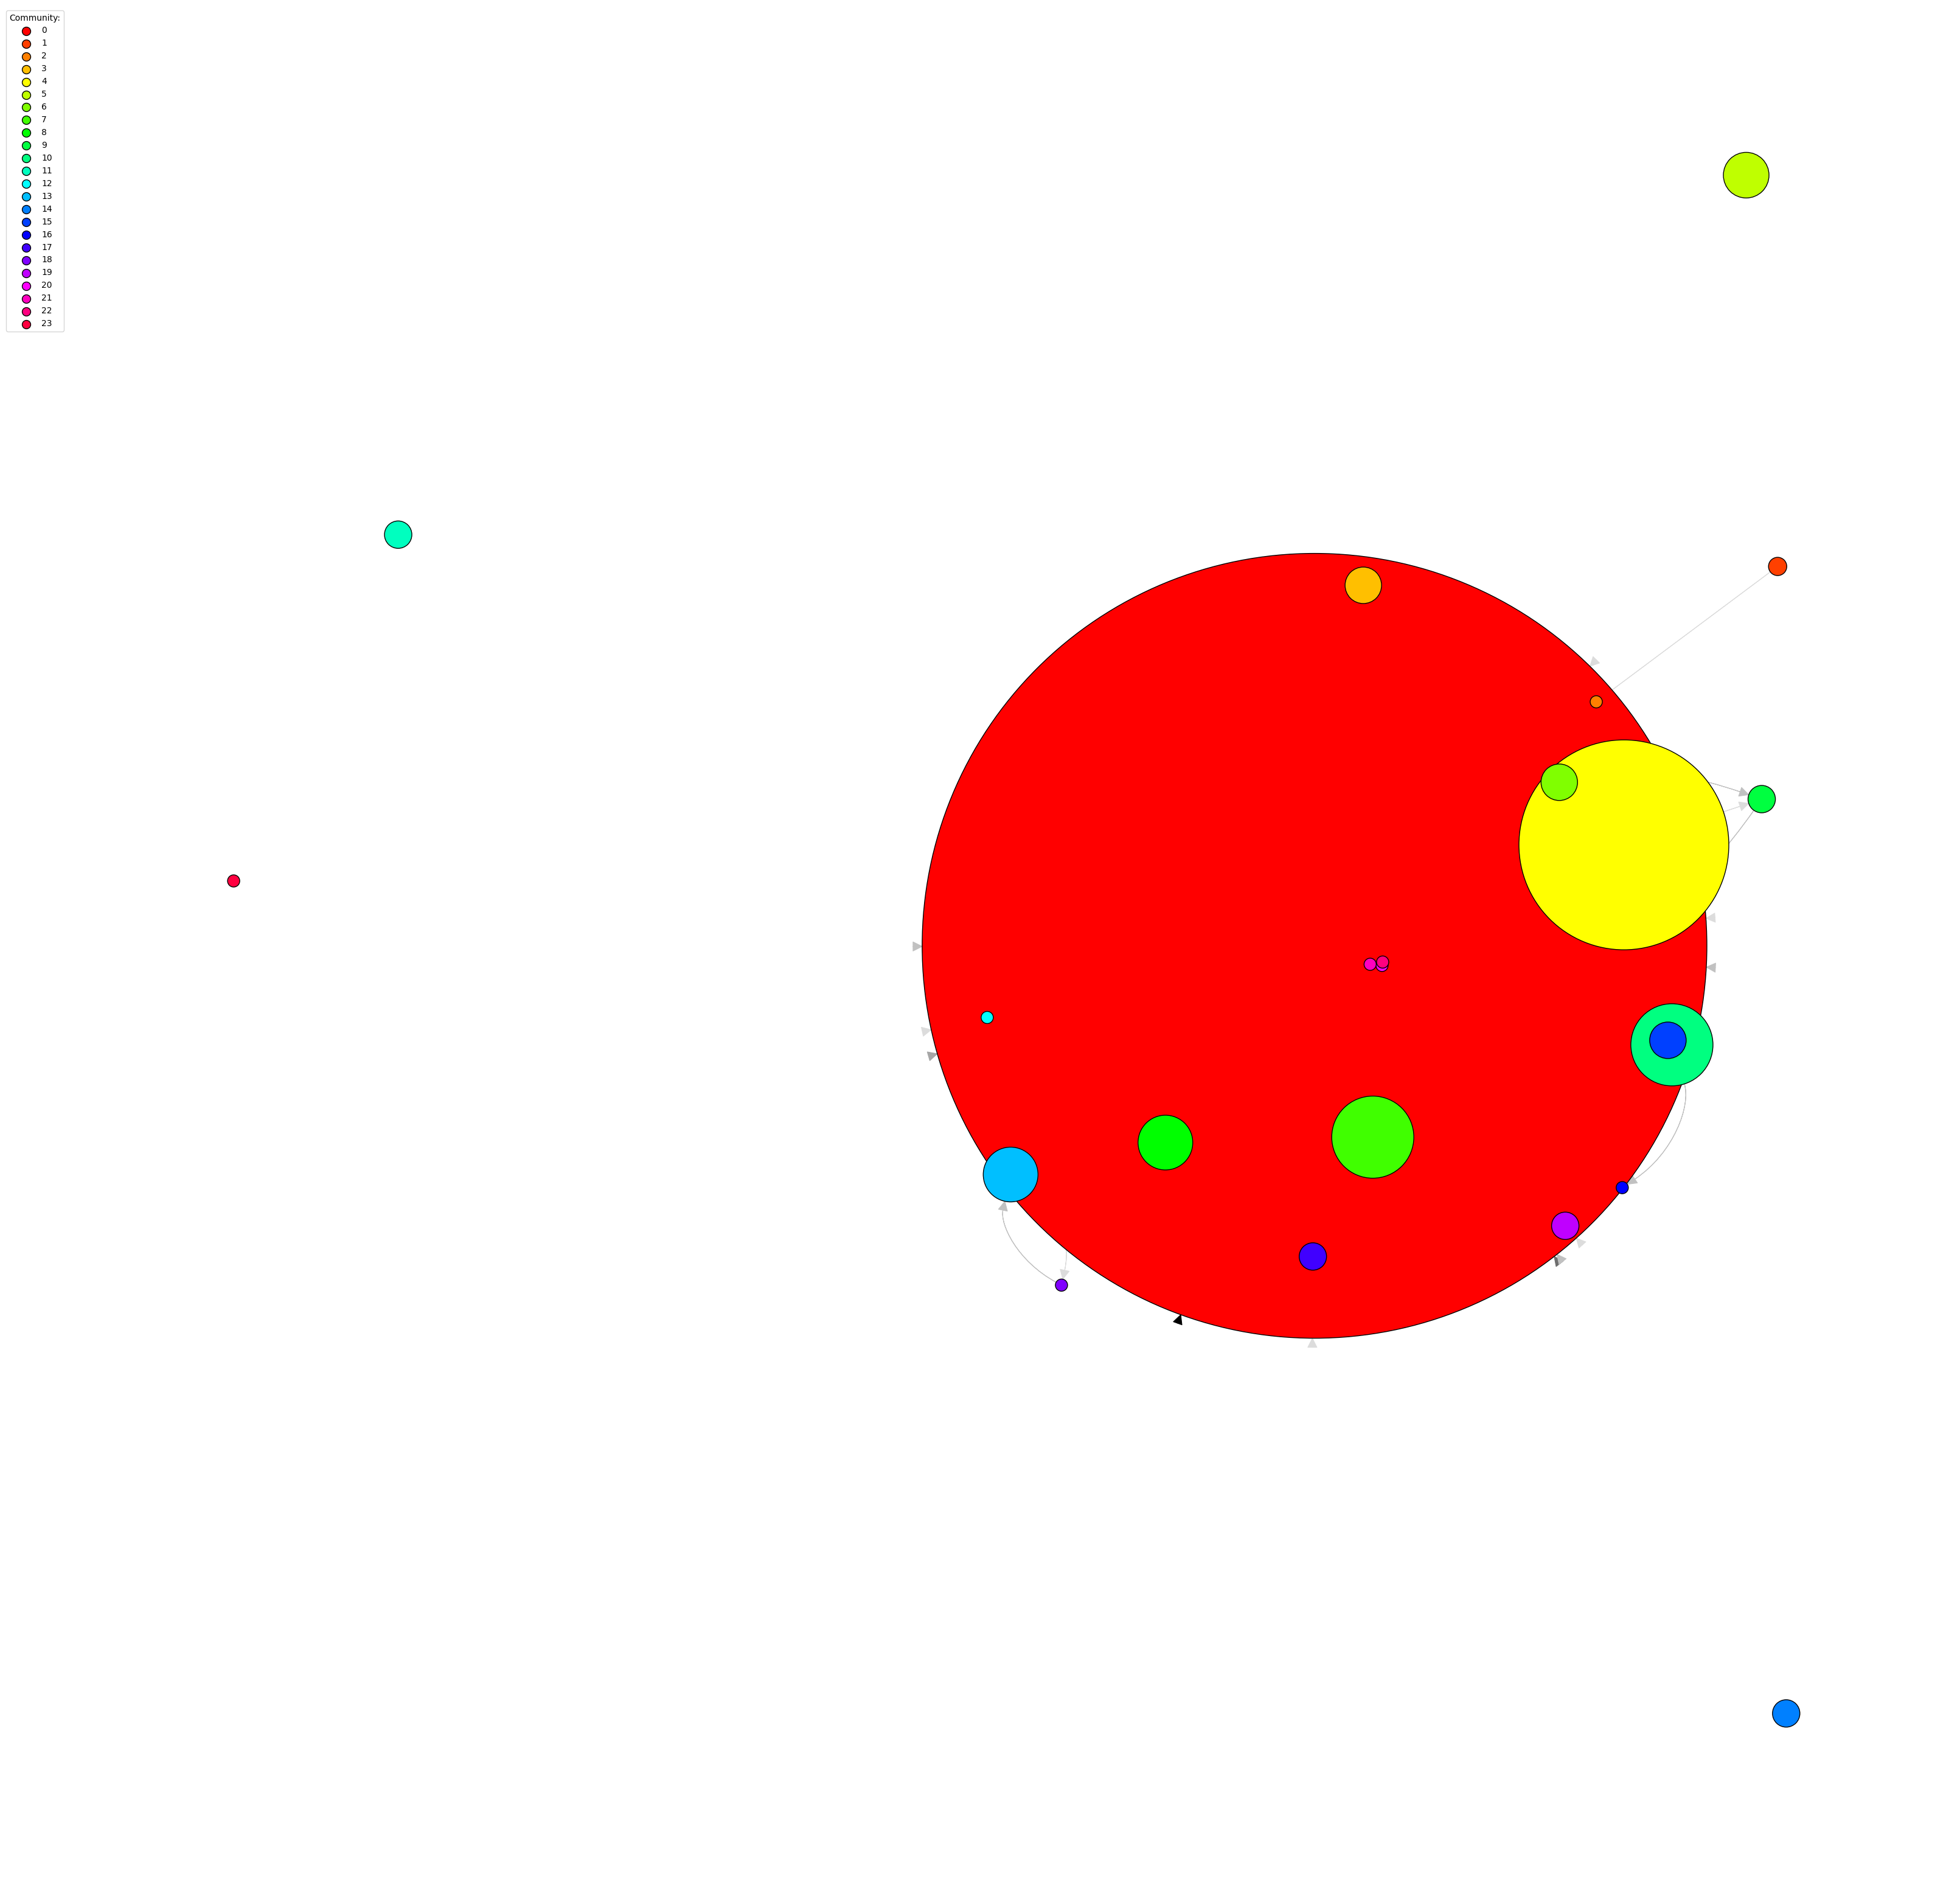

In [15]:
palette2 = ig.GradientPalette("gainsboro", "black")
g.es["color"] = [palette2.get(int(i)) for i in ig.rescale(cluster_graph.es["size"], (0, 255), clamp=True)]

fig2, ax2 = plt.subplots()
ig.plot(
    cluster_graph,
    target=ax2,
    palette=palette1,
    # set a minimum size on vertex_size, otherwise vertices are too small
    vertex_size=[max(20, size) for size in cluster_graph.vs["size"]],
    vertex_alpha=0.2,
    node_alpha=0.2,
    edge_color=g.es["color"],
    edge_width=0.8,
)

# Add a legend
legend_handles = []
for i in range(num_communities):
    handle = ax2.scatter(
        [], [],
        s=100,
        facecolor=palette1.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)

ax2.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax2.transAxes,
)

fig2.set_size_inches(40, 40)